# Finding the Best Markets to Advertise In #

Background: E-learning company that offers courses on web and mobile development, data science, game development and so on.

Objective: Find two best markets to advertise

Includes:

* Data Cleansing and standardisation
* Analysis
* Conclusions

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure input in columns is not truncated
pd.set_option('display.max_colwidth', None)
# Ensure all columns are shown
pd.set_option('display.max_columns', None)  

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

## Data Selection ##

Given high cost and effort of organising survey, it is decided to use existing survey that can contain information on the target market.

Survey from freeCodeCamp will be used for this purpose [here](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) is a quick overview of the survey.   
 
The survey can be obtained from GitHub [here](https://github.com/freeCodeCamp/2017-new-coder-survey)





In [409]:

survey.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Age                            float64
 1   AttendedBootcamp               float64
 2   BootcampFinish                 float64
 3   BootcampLoanYesNo              float64
 4   BootcampName                   object 
 5   BootcampRecommend              float64
 6   ChildrenNumber                 float64
 7   CityPopulation                 object 
 8   CodeEventConferences           float64
 9   CodeEventDjangoGirls           float64
 10  CodeEventFCC                   float64
 11  CodeEventGameJam               float64
 12  CodeEventGirlDev               float64
 13  CodeEventHackathons            float64
 14  CodeEventMeetup                float64
 15  CodeEventNodeSchool            float64
 16  CodeEventNone                  float64
 17  CodeEventOther                 object 
 18  CodeE

In [410]:
survey['JobRoleInterest'].describe()

count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: JobRoleInterest, dtype: object

In [411]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [412]:
print('Total Count JobRoleInterest (excl. NaN): ', survey['JobRoleInterest'].count(), '\n', '-------------', '\n')
print('Total NaN Count JobRoleInterest (incl. NaN): ', survey['JobRoleInterest'].isna().sum(), '\n', '-------------', '\n')
print('Actual Values %: ', round((survey['JobRoleInterest'].notna().sum()/survey['JobRoleInterest'].isna().sum())*100,2), '\n', '-------------', '\n')
print('Requency Table for JobRoleInterest: ', '\n', survey['JobRoleInterest'].value_counts(), '\n', '-------------', '\n')



Total Count JobRoleInterest (excl. NaN):  6992 
 ------------- 

Total NaN Count JobRoleInterest (incl. NaN):  11183 
 ------------- 

Actual Values %:  62.52 
 ------------- 

Requency Table for JobRoleInterest:  
 Full-Stack Web Developer                                                                                                                                                                                                                 823
  Front-End Web Developer                                                                                                                                                                                                                450
  Data Scientist                                                                                                                                                                                                                         152
Back-End Web Developer                                                   

## Data Cleansing ##

In [413]:
# Clean NaN and re-run the stats
survey_cln = survey.dropna(subset=['JobRoleInterest'],axis=0).copy()
print('Total Count JobRoleInterest (excl. NaN): ', survey_cln['JobRoleInterest'].count(), '\n', '-------------', '\n')
print('Total NaN Count JobRoleInterest (incl. NaN): ', survey_cln['JobRoleInterest'].isna().sum(), '\n', '-------------', '\n')
print('Normalized Requency Table for JobRoleInterest: ', '\n', round(survey_cln['JobRoleInterest'].value_counts(normalize=True)*100,2), '\n', '-------------', '\n')



Total Count JobRoleInterest (excl. NaN):  6992 
 ------------- 

Total NaN Count JobRoleInterest (incl. NaN):  0 
 ------------- 

Normalized Requency Table for JobRoleInterest:  
 Full-Stack Web Developer                                                                                                                                                                                                                 11.77
  Front-End Web Developer                                                                                                                                                                                                                 6.44
  Data Scientist                                                                                                                                                                                                                          2.17
Back-End Web Developer                                                                                

## Suitability of the Sample for Research ##

The sample is suitable for the research as it has individuals interested in Web and Mobile development, sometimes both and sometimes together with other disciplines.  

'Mixed' interest creates opportunity to draw from the larger pool of people.  Let's look how those interests break down by people in our target market:

- Web Development
- Mobile Development
- Mobile or Web Development together with other interests


In [414]:
import re
b_mob = survey_cln['JobRoleInterest'].str.contains('mobile', regex=True, flags=re.I)
b_web = survey_cln['JobRoleInterest'].str.contains('web', regex=True, flags=re.I)
b_single = survey_cln['JobRoleInterest'].str.strip().str.split(',').apply(len) == 1


Target Market Breakdown: 

Mobile Only                     1.59
Web Only                       20.27
Mob or Web with other          64.75
Total Interested Mob or Web    86.61
Other Interests                13.39
dtype: float64
------------- 





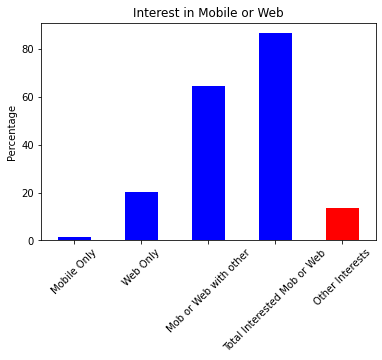

In [442]:
market_break = dict()

market_break['Mobile Only'] = round((survey_cln.loc[b_mob & b_single, 'JobRoleInterest'].count()/survey_cln['JobRoleInterest'].count())*100,2)
market_break['Web Only'] = round((survey_cln.loc[b_web & b_single, 'JobRoleInterest'].count()/survey_cln['JobRoleInterest'].count())*100,2)
market_break['Mob or Web with other'] = round((survey_cln.loc[(b_mob | b_web) & ~b_single, 'JobRoleInterest'].count()/survey_cln['JobRoleInterest'].count())*100,2)
market_break['Total Interested Mob or Web'] = (market_break['Mobile Only'] + market_break['Web Only'] + market_break['Mob or Web with other'])
market_break['Other Interests'] = (100 - market_break['Total Interested Mob or Web'])
# market_break['Total'] = survey_cln['JobRoleInterest'].count()

s_market_break = pd.Series(market_break)
print('Target Market Breakdown:','\n')
print(s_market_break)
print('-------------','\n\n\n')
s_market_break.plot(kind='bar', rot=45, color=['b','b','b','b','r'])
plt.ylabel('Percentage')
plt.title('Interest in Mobile or Web')
plt.show()


### Observations ###

- Most of the people (86%) are interested in Mobile or Web
- Minority of about 21% are focused only on one type of development
- Majority of about 64% are interested in Mobile and Web Development along with other interest

For overall data of 11K over 6K responded to the Job Interest question.  Of that absolute majority of 86% (or about 4.5K) represent our target market.

Assuming the overall data are representative the sample size indicates that subset of data interested in Mobile and Web is representative as well. 

## Location and Densities of New Coders ##

The objective of the next step of analysis is to determine top two countries suitable for advertising our product.  The criteria for the top countries is based on 
* number of respondents that currently live in the country i.e. the largest two countries by the respondents.
* amount of spend (in other words we need to look if volume of customers will translate into revenue)


In [443]:
target_loc = pd.DataFrame({'Absolute':survey_cln['CountryLive'].value_counts(),'Percentage':round(survey_cln['CountryLive'].value_counts(normalize=True)*100,2)})
target_loc

,Absolute,Percentage
United States of America,2933,47.22
India,463,7.45
United Kingdom,279,4.49
Canada,240,3.86
Poland,122,1.96
...,...,...
Nicaragua,1,0.02
Yemen,1,0.02
Papua New Guinea,1,0.02
Guatemala,1,0.02


### Observations ###

It is not sufficient to rely on the volume of the interested market alone.  We need to see how much the target country market would be capable of spending.

In the next steps we will ascertain how much money potential target market spends a month focusing on top 5 countries by volume: USA, India, UK, Canada and Poland.

In [417]:
survey_cln['MonthsProgramming'] = survey_cln['MonthsProgramming'].apply(lambda x : 1 if x == 0 else x)
survey_cln['MonthlySpend'] = survey_cln['MoneyForLearning']/survey_cln['MonthsProgramming']



In [418]:
survey_cln = survey_cln.dropna(subset=['MonthlySpend','CountryLive'],axis=0)
survey_cln_top5 = survey_cln.loc[survey_cln['CountryLive'].isin(target_loc.index[:5])]

In [419]:
survey_cln_top5.groupby('CountryLive')['MonthlySpend'].agg(['count',np.sum, np.mean]).sort_values(by=['mean'], ascending=False)

,count,sum,mean
CountryLive,,,
United States of America,2933,668718.121808,227.997996
India,463,62551.754651,135.100982
Canada,240,27242.630637,113.510961
Poland,122,9232.830087,75.678935
United Kingdom,279,12704.109639,45.534443


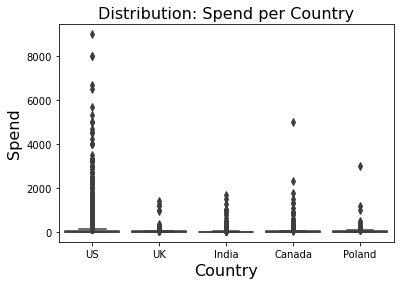

In [445]:
sns.boxplot(x='CountryLive', y='MonthlySpend', data=survey_cln_top5)
plt.title('Distribution: Spend per Country', fontsize=16)
plt.xticks(range(5),['US', 'UK', 'India', 'Canada', 'Poland'])
plt.xlabel('Country', fontsize=16)
plt.ylabel('Spend', fontsize=16)
plt.show()

 ### Observations ###

There are clear outlayers in the monthly spend in the US state that skew the data.  
Removing data with spend more than 10,000 a month as unlikely

In [421]:
# Remove outlier of more than 10K a month spend
survey_cln_top5 = survey_cln_top5[survey_cln_top5['MonthlySpend']<=10000]



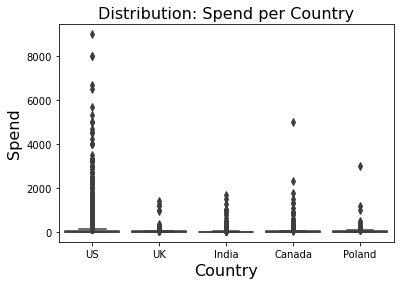

In [447]:
sns.boxplot(x='CountryLive', y='MonthlySpend', data=survey_cln_top5)
plt.title('Distribution: Spend per Country', fontsize=16)
plt.xticks(range(5),['US', 'UK', 'India', 'Canada', 'Poland'])
plt.xlabel('Country', fontsize=16)
plt.ylabel('Spend', fontsize=16)
plt.show()

 ### Observations ###

Examine further outliers with value of more than 2,000 a month to see if there are any further clues that would explain this.

Reported costs of the bootcamp are up to 24,000 in the US.  For the rest of the country based on the Distribution that it would be unusual to have anything above 2,000 and require further examination.  

In [423]:
b_ind_out = (survey_cln_top5['MonthlySpend'] >=2000) & (survey_cln_top5['CountryLive'] == 'India')
b_us_out = (survey_cln_top5['MonthlySpend'] >=5000) & (survey_cln_top5['CountryLive'] == 'United States of America')
b_uk_out = (survey_cln_top5['MonthlySpend'] >=2000) & (survey_cln_top5['CountryLive'] == 'United Kingdom')
b_can_out = (survey_cln_top5['MonthlySpend'] >=2000) & (survey_cln_top5['CountryLive'] == 'Canada')
b_pol_out = (survey_cln_top5['MonthlySpend'] >=2000) & (survey_cln_top5['CountryLive'] == 'Poland')

cols_of_int = ['AttendedBootcamp','BootcampFinish','ExpectedEarning','MoneyForLearning','MonthlySpend']

In [424]:
survey_cln_top5[b_ind_out][cols_of_int]

,AttendedBootcamp,BootcampFinish,ExpectedEarning,MoneyForLearning,MonthlySpend
1728,0.0,NaN,70000.0,20000.0,5000.000000
1755,0.0,NaN,100000.0,50000.0,3333.333333
7989,0.0,NaN,500000.0,5000.0,5000.000000
8126,0.0,NaN,80000.0,5000.0,5000.000000
9410,0.0,NaN,80000.0,2000.0,2000.000000
12451,0.0,NaN,60000.0,8000.0,2000.000000
13398,0.0,NaN,100000.0,20000.0,10000.000000
15587,0.0,NaN,65000.0,100000.0,4166.666667


In [425]:
survey_cln_top5[b_us_out][cols_of_int]

,AttendedBootcamp,BootcampFinish,ExpectedEarning,MoneyForLearning,MonthlySpend
718,1.0,0.0,50000.0,8000.0,8000.000000
1222,1.0,0.0,50000.0,13000.0,6500.000000
3145,1.0,0.0,90000.0,17000.0,5666.666667
3184,1.0,1.0,60000.0,9000.0,9000.000000
5769,0.0,NaN,85000.0,15000.0,5000.000000
6528,0.0,NaN,60000.0,5000.0,5000.000000
7505,1.0,0.0,65000.0,20000.0,6666.666667
8202,1.0,NaN,20000.0,15000.0,5000.000000
8901,1.0,0.0,75000.0,15000.0,5000.000000
9778,1.0,0.0,55000.0,8000.0,8000.000000


In [426]:
survey_cln_top5[b_uk_out][cols_of_int]

,AttendedBootcamp,BootcampFinish,ExpectedEarning,MoneyForLearning,MonthlySpend


In [427]:
survey_cln_top5[b_can_out][cols_of_int]

,AttendedBootcamp,BootcampFinish,ExpectedEarning,MoneyForLearning,MonthlySpend
6590,1.0,1.0,50000.0,14023.0,2337.166667
8726,0.0,NaN,65000.0,2000.0,2000.000000
13659,1.0,0.0,60000.0,10000.0,5000.000000


In [428]:
survey_cln_top5[b_pol_out][cols_of_int]

,AttendedBootcamp,BootcampFinish,ExpectedEarning,MoneyForLearning,MonthlySpend
1040,1.0,0.0,30000.0,3000.0,3000.0


### Observations & Criteria to Remove Outliers ###

India:
Interesting that that 8 people who spend over 2,000 and sometimes up to 10,000 did not indicate that they attended a bootcamp at all.  These values are unlikely to be acurate and need to be removed to avoid skewage.

US:
There are 12 people with 9 flagging Bootcamp attendance.  Remove individuals who did not flag attendance as the rest are within 25,000 that is possible to spend on a bootcamp.

UK:
There is none in the UK who spend over 2,000.

Canada:
There is 3 people who spent 2,000 and 2 attended bootcamp.  Remove individual who did not attend. 

Poland:
There is 1 persopn who spend 3,000 and attended bootcamp.  We assume it is possible particularly as the individual is currently employed.  

Action to be taken to remove outliers:
* India everyone who spent over 2,000 and did not indicate attending bootcamp
* US anyone who spend over 5,000 and under 25,000 without attending bootcamp
* Canada remove individual who did not attend bootcamp

In [432]:
# Remove outliers
b_to_drop_india = (survey_cln_top5['MonthlySpend'] >=2000) & (survey_cln_top5['CountryLive'] == 'India')
survey_cln_top5 = survey_cln_top5.drop(survey_cln_top5[b_to_drop_india].index)
b_to_drop_us = ((survey_cln_top5['MonthlySpend'] >=5000) & (survey_cln_top5['CountryLive'] == 'United States of America') & (survey_cln_top5['AttendedBootcamp'] == 0.0))
survey_cln_top5 = survey_cln_top5.drop(survey_cln_top5[b_to_drop_us].index)
b_to_drop_can = ((survey_cln_top5['MonthlySpend'] >=2000) & (survey_cln_top5['CountryLive'] == 'Canada') & (survey_cln_top5['AttendedBootcamp'] == 0.0))
survey_cln_top5 = survey_cln_top5.drop(survey_cln_top5[b_to_drop_can].index)

In [437]:
survey_cln_conclusions = survey_cln_top5.groupby('CountryLive')['MonthlySpend'].agg(['count',np.sum, np.mean]).sort_values(by=['mean'], ascending=False)

survey_cln_conclusions

,count,sum,mean
CountryLive,,,
United States of America,2923,444718.121808,152.144414
Canada,239,25242.630637,105.617701
Poland,122,9232.830087,75.678935
India,455,26051.754651,57.256604
United Kingdom,279,12704.109639,45.534443


In [439]:
survey_cln_top5['CountryLive'].value_counts(normalize = True) * 100

United States of America    72.747636
India                       11.324042
United Kingdom               6.943753
Canada                       5.948233
Poland                       3.036336
Name: CountryLive, dtype: float64

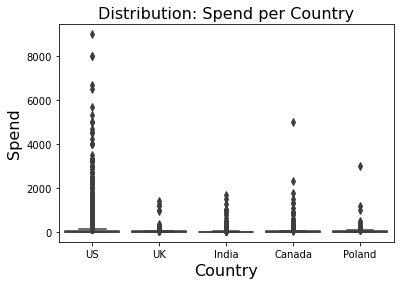

In [435]:
chart = sns.boxplot(x='CountryLive', y='MonthlySpend', data=survey_cln_top5)
plt.title('Distribution: Spend per Country', fontsize=16)
plt.xticks(range(5),['US', 'UK', 'India', 'Canada', 'Poland'])
plt.xlabel('Country', fontsize=16)
plt.ylabel('Spend', fontsize=16)
plt.show()

# Conclusions: Finding Two Best Markets #

The US is a clear winner with both average spend and size of the market.  Also outliers tell us that we can potentially create add-on product to take advantage of the higher end of the US market that has capacity to spend thousands.

Which is a choice for another Market?

Poland is eleminated due to relatively small market growth potential.  

There decision is between India and Canada.  Canada has average spend twice as big as India.  India on the other hand indicates twice as big a market.  In fact Indian market would be much larger in reality given that 4 times as large (1.3 vs 0.3 billion).

Further analysis required to decide based on:
- marketing strategy (including percentage allocation)
- marketing costs and budgets per country
- pricing strategy if it is possible to offer different prices for different markets
